# 1. Load Requirement Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.util as utils
from imblearn.under_sampling import RandomUnderSampler

# 2. Load Confoguration File

In [2]:
config = utils.load_config()

# 3. Load Train Set

In [3]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [4]:
x_train

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
209,41,7,184,84,33,0,35.5,0.355
176,42,6,85,78,0,0,31.2,0.382
147,34,2,106,64,35,119,30.5,1.400
454,24,2,100,54,28,105,37.8,0.498
636,48,5,104,74,0,0,28.8,0.153
...,...,...,...,...,...,...,...,...
214,36,9,112,82,32,175,34.2,0.260
113,25,4,76,62,0,0,34.0,0.391
556,30,1,97,70,40,0,38.1,0.218
759,66,6,190,92,0,0,35.5,0.278


In [5]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [6]:
x, y = RandomUnderSampler(random_state = 42).fit_resample(x_train, y_train)
train_set_bal = pd.concat([x, y], axis = 1)

In [7]:
train_set_bal

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


# 4. Data Exploration

## 4.1 Quick look at dataset

In [8]:
# Quick take a look to our train data
train_set

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
209,41,7,184,84,33,0,35.5,0.355,1
176,42,6,85,78,0,0,31.2,0.382,0
147,34,2,106,64,35,119,30.5,1.400,0
454,24,2,100,54,28,105,37.8,0.498,0
636,48,5,104,74,0,0,28.8,0.153,0
...,...,...,...,...,...,...,...,...,...
214,36,9,112,82,32,175,34.2,0.260,1
113,25,4,76,62,0,0,34.0,0.391,0
556,30,1,97,70,40,0,38.1,0.218,0
759,66,6,190,92,0,0,35.5,0.278,1


## 4.2. Label distribution

[Text(0, 0, '350'), Text(0, 0, '187')]

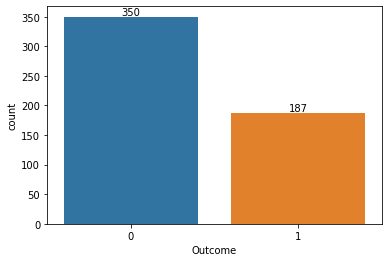

In [9]:
# Check distribution of our label data
ax = sns.countplot(data = train_set, x = "Outcome", label = train_set["Outcome"].unique())
ax.bar_label(ax.containers[0])

#### Class 0 is much hinger class 1
#### We need to balancing it

[Text(0, 0, '187'), Text(0, 0, '187')]

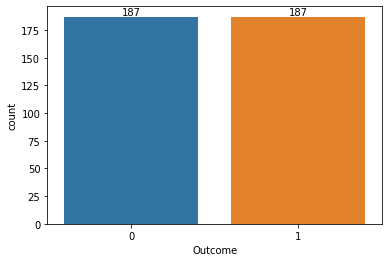

In [10]:
# Check distribution of our label data
ax = sns.countplot(data = train_set_bal, x = "Outcome", label = train_set["Outcome"].unique())
ax.bar_label(ax.containers[0])

## 4.3 Pregnancies Distribution

<Axes: xlabel='Pregnancies', ylabel='Density'>

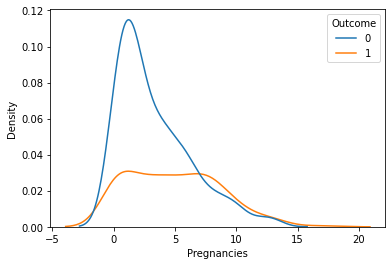

In [11]:
# Check distribution of Pregnancies
sns.kdeplot(data = train_set, x = "Pregnancies", hue = "Outcome")

<Axes: xlabel='Pregnancies', ylabel='Density'>

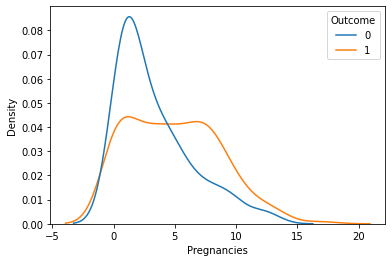

In [12]:
# Dist for balanced dara
sns.kdeplot(data = train_set_bal, x = "Pregnancies", hue = "Outcome")

<Axes: xlabel='Pregnancies'>

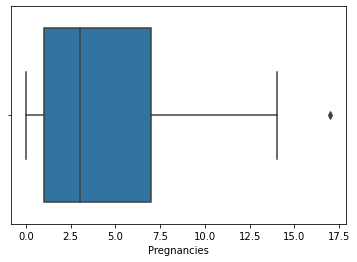

In [13]:
# Check for iqr
sns.boxplot(data = train_set_bal, x = "Pregnancies")

In [14]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Pregnancies"].quantile(0.25)
q3 = train_set_bal["Pregnancies"].quantile(0.75)
iqr = q3 - q1

In [15]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_preg = train_set_bal[~((train_set_bal["Pregnancies"] < (q1 - 1.5 * iqr)) | (train_set_bal["Pregnancies"] > (q3 + 1.5 * iqr)))].copy()

<Axes: xlabel='Pregnancies', ylabel='Density'>

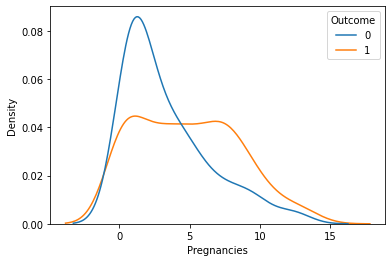

In [16]:
sns.kdeplot(data = train_set_bal_preg, x = "Pregnancies", hue = "Outcome")

In [17]:
train_set_bal_preg

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.4 Glucose Distribution

<Axes: xlabel='Glucose', ylabel='Density'>

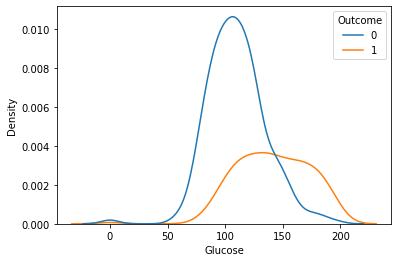

In [18]:
# Check distribution of Glucose 
sns.kdeplot(data = train_set, x = "Glucose", hue = "Outcome")

<Axes: xlabel='Glucose', ylabel='Density'>

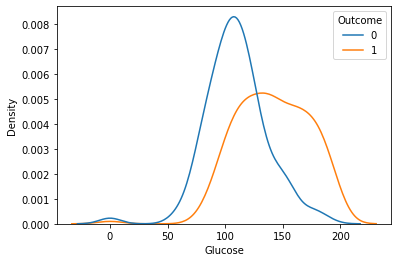

In [19]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x = "Glucose", hue = "Outcome")

<Axes: xlabel='Glucose'>

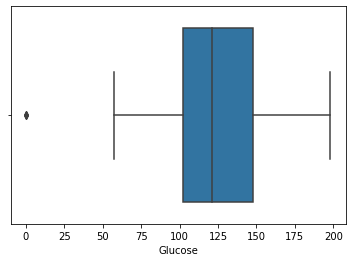

In [20]:
# Check for iqr
sns.boxplot(data = train_set_bal, x = "Glucose")

<Axes: xlabel='Glucose', ylabel='Density'>

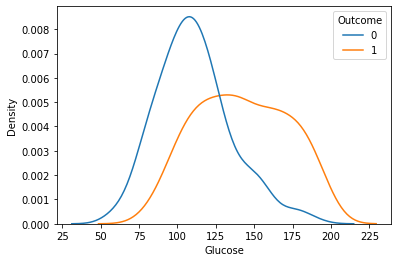

In [21]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Glucose"].quantile(0.25)
q3 = train_set_bal["Glucose"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_glu = train_set_bal[~((train_set_bal["Glucose"] < (q1 - 1.5 * iqr)) | (train_set_bal["Glucose"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_glu, x = "Glucose", hue = "Outcome")

In [22]:
train_set_bal_glu

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.5 Blood Pressure Distribution

<Axes: xlabel='BloodPressure', ylabel='Density'>

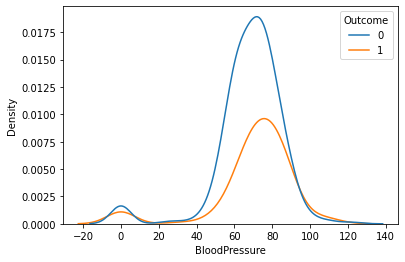

In [23]:
# Check distribution of blood pressure
sns.kdeplot(data = train_set, x="BloodPressure", hue="Outcome")

<Axes: xlabel='BloodPressure', ylabel='Density'>

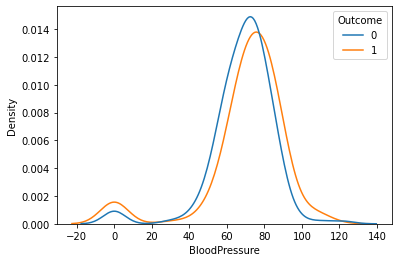

In [24]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x="BloodPressure", hue="Outcome")

<Axes: xlabel='BloodPressure'>

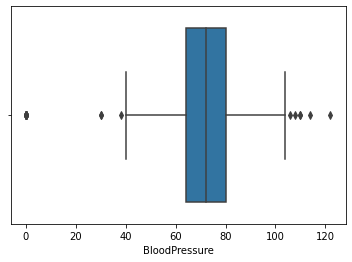

In [25]:
# Check for iqr
sns.boxplot(data=train_set_bal, x="BloodPressure")

<Axes: xlabel='BloodPressure', ylabel='Density'>

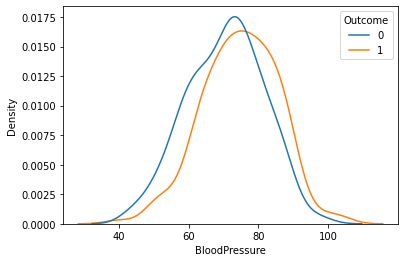

In [26]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["BloodPressure"].quantile(0.25)
q3 = train_set_bal["BloodPressure"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_blo = train_set_bal[~((train_set_bal["BloodPressure"] < (q1 - 1.5 * iqr)) | (train_set_bal["BloodPressure"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_blo, x = "BloodPressure", hue = "Outcome")

In [27]:
train_set_bal_blo

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.6 SkinThickness Distribution

<Axes: xlabel='SkinThickness', ylabel='Density'>

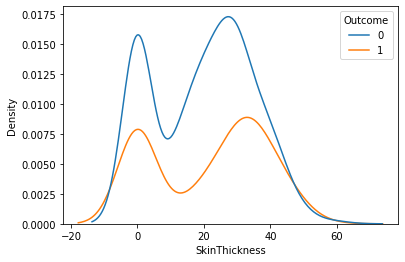

In [28]:
# Check distribution of skin thickness
sns.kdeplot(data=train_set, x="SkinThickness", hue="Outcome")

<Axes: xlabel='SkinThickness', ylabel='Density'>

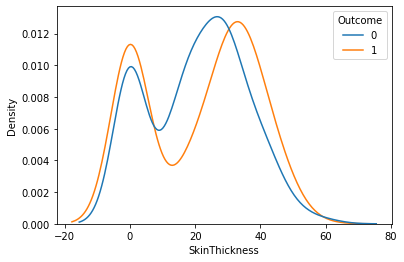

In [29]:
# Check for balanced data
sns.kdeplot(data=train_set_bal, x="SkinThickness", hue="Outcome")

## 4.7 Insulin Distribution

<Axes: xlabel='Insulin', ylabel='Density'>

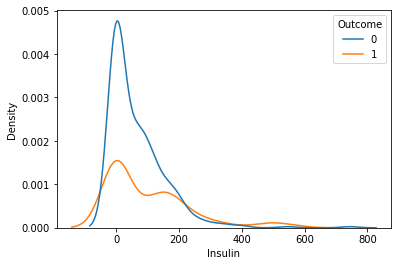

In [30]:
# Check distribution of insulin
sns.kdeplot(data=train_set, x="Insulin", hue="Outcome")

<Axes: xlabel='Insulin', ylabel='Density'>

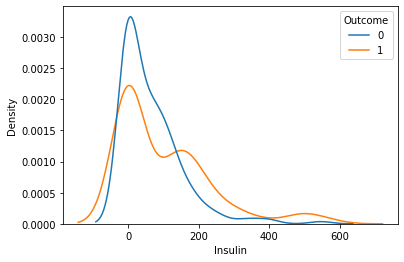

In [31]:
# Check for balanced data
sns.kdeplot(data=train_set_bal, x="Insulin", hue="Outcome")

<Axes: xlabel='Insulin'>

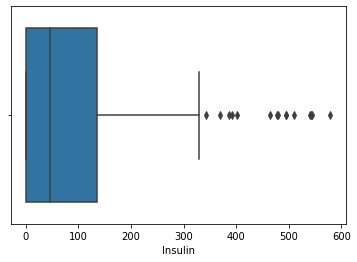

In [32]:
# Check for iqr
sns.boxplot(data=train_set_bal, x="Insulin")

<Axes: xlabel='Insulin', ylabel='Density'>

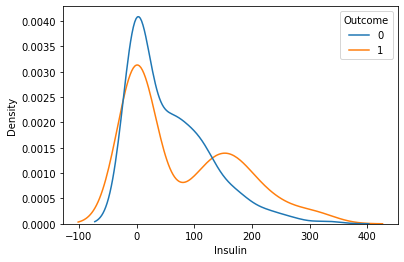

In [33]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Insulin"].quantile(0.25)
q3 = train_set_bal["Insulin"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_ins = train_set_bal[~((train_set_bal["Insulin"] < (q1 - 1.5 * iqr)) | (train_set_bal["Insulin"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_ins, x = "Insulin", hue = "Outcome")

In [34]:
train_set_bal_ins

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.8 BMI Distribution

<Axes: xlabel='BMI', ylabel='Density'>

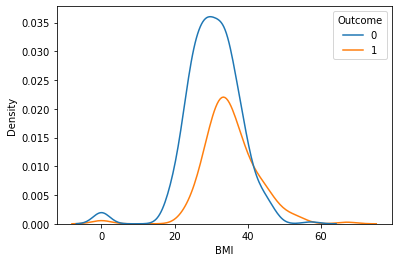

In [35]:
# Check distribution of bmi
sns.kdeplot(data=train_set, x="BMI", hue="Outcome")

<Axes: xlabel='BMI', ylabel='Density'>

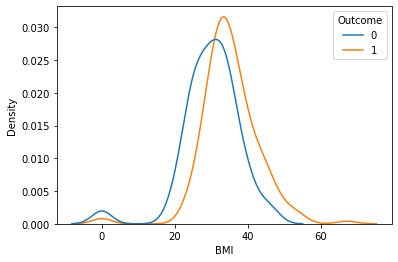

In [36]:
# Check for balanced data
sns.kdeplot(data=train_set_bal, x="BMI", hue="Outcome")

<Axes: xlabel='BMI'>

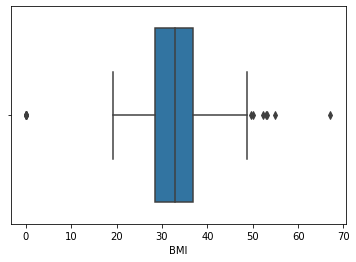

In [37]:
# Check for iqr
sns.boxplot(data=train_set_bal, x="BMI")

<Axes: xlabel='BMI', ylabel='Density'>

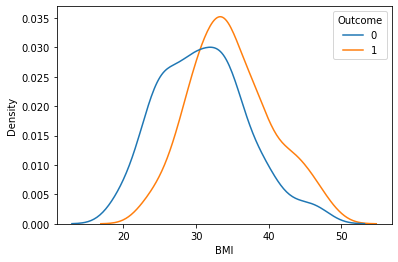

In [38]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["BMI"].quantile(0.25)
q3 = train_set_bal["BMI"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_bmi = train_set_bal[~((train_set_bal["BMI"] < (q1 - 1.5 * iqr)) | (train_set_bal["BMI"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_bmi, x = "BMI", hue = "Outcome")

In [39]:
train_set_bal_bmi

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
269,28,2,146,0,0,0,27.5,0.240,1
255,21,1,113,64,35,0,33.6,0.543,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.9 Diabetes Pedigree Function Distribution

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

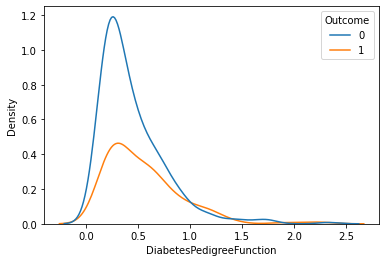

In [40]:
# Check distribution of Pedigree Function Distribution
sns.kdeplot(data=train_set, x="DiabetesPedigreeFunction", hue="Outcome")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

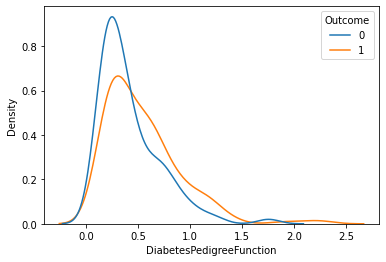

In [41]:
# Check for balanced data
sns.kdeplot(data=train_set_bal, x="DiabetesPedigreeFunction", hue="Outcome")

<Axes: xlabel='DiabetesPedigreeFunction'>

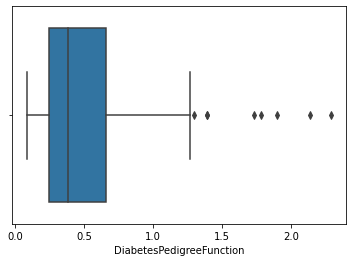

In [42]:
# Check iqr
sns.boxplot(data=train_set_bal, x="DiabetesPedigreeFunction")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

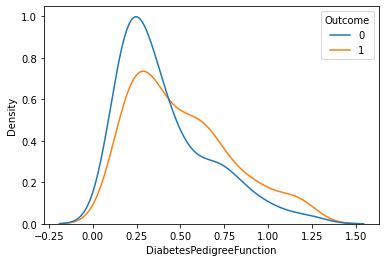

In [43]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["DiabetesPedigreeFunction"].quantile(0.25)
q3 = train_set_bal["DiabetesPedigreeFunction"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_bpf = train_set_bal[~((train_set_bal["DiabetesPedigreeFunction"] < (q1 - 1.5 * iqr)) | (train_set_bal["DiabetesPedigreeFunction"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_bpf, x = "DiabetesPedigreeFunction", hue = "Outcome")

In [44]:
train_set_bal_bpf

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.10 Age Distribution

<Axes: xlabel='Age', ylabel='Density'>

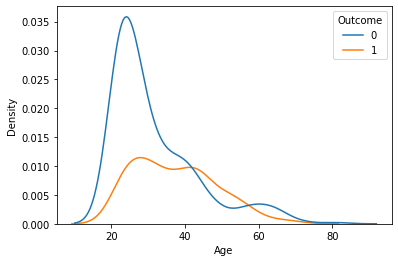

In [45]:
# Check distribution of age
sns.kdeplot(data=train_set, x="Age", hue="Outcome")

<Axes: xlabel='Age', ylabel='Density'>

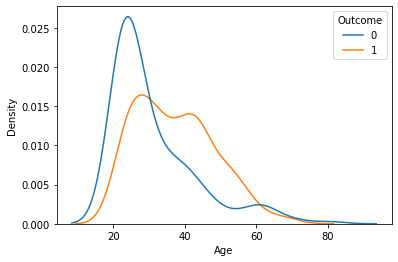

In [46]:
# Check for balanced data 
sns.kdeplot(data=train_set_bal, x="Age", hue="Outcome")

<Axes: xlabel='Age'>

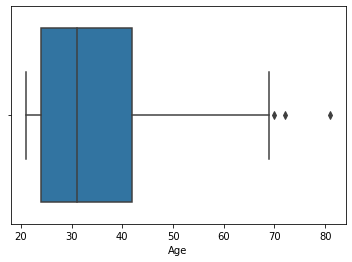

In [47]:
# check iqr
sns.boxplot(data=train_set_bal, x="Age")

<Axes: xlabel='Age', ylabel='Density'>

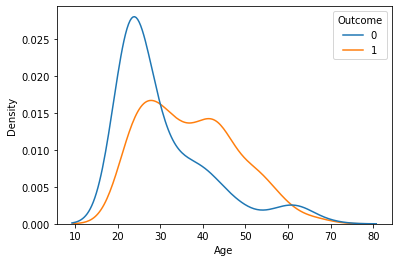

In [48]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Age"].quantile(0.25)
q3 = train_set_bal["Age"].quantile(0.75)
iqr = q3 - q1

# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_age = train_set_bal[~((train_set_bal["Age"] < (q1 - 1.5 * iqr)) | (train_set_bal["Age"] > (q3 + 1.5 * iqr)))].copy()

sns.kdeplot(data = train_set_bal_age, x = "Age", hue = "Outcome")

In [49]:
train_set_bal_age

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
507,21,1,130,60,23,170,28.6,0.692,0
271,21,2,108,62,32,56,25.2,0.128,0
250,42,9,106,52,0,0,31.2,0.380,0
79,24,2,112,66,22,0,25.0,0.307,0
487,58,0,173,78,32,265,46.5,1.159,0
...,...,...,...,...,...,...,...,...,...
255,21,1,113,64,35,0,33.6,0.543,1
120,25,0,162,76,56,100,53.2,0.759,1
306,47,10,161,68,23,132,25.5,0.326,1
214,36,9,112,82,32,175,34.2,0.260,1


## 4.11 Cleaned Data

In [50]:
train_set_bal_cleaned = pd.concat(
    [
        train_set_bal_preg,
        train_set_bal_ins,
        train_set_bal_glu,
        train_set_bal_bpf,
        train_set_bal_blo,
        train_set_bal_bmi,
        train_set_bal_age
    ]
)

In [51]:
count_duplicated_index = train_set_bal_cleaned.index.value_counts()

In [52]:
used_index_data = count_duplicated_index[count_duplicated_index == 7 ].index

In [53]:
train_set_bal_cleaned = train_set_bal_cleaned.loc[used_index_data].drop_duplicates()

In [54]:
train_set_bal_cleaned

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,50,6,148,72,35,0,33.6,0.627,1
165,41,6,104,74,18,156,29.9,0.722,1
201,28,1,138,82,0,0,40.1,0.236,0
197,23,3,107,62,13,48,22.9,0.678,1
195,29,5,158,84,41,210,39.4,0.395,1
...,...,...,...,...,...,...,...,...,...
506,35,0,180,90,26,90,36.5,0.314,1
404,41,5,168,64,0,0,32.9,0.135,1
498,55,7,195,70,33,145,25.1,0.163,1
500,21,2,117,90,19,71,25.2,0.313,0


## 4.12 Pairplot

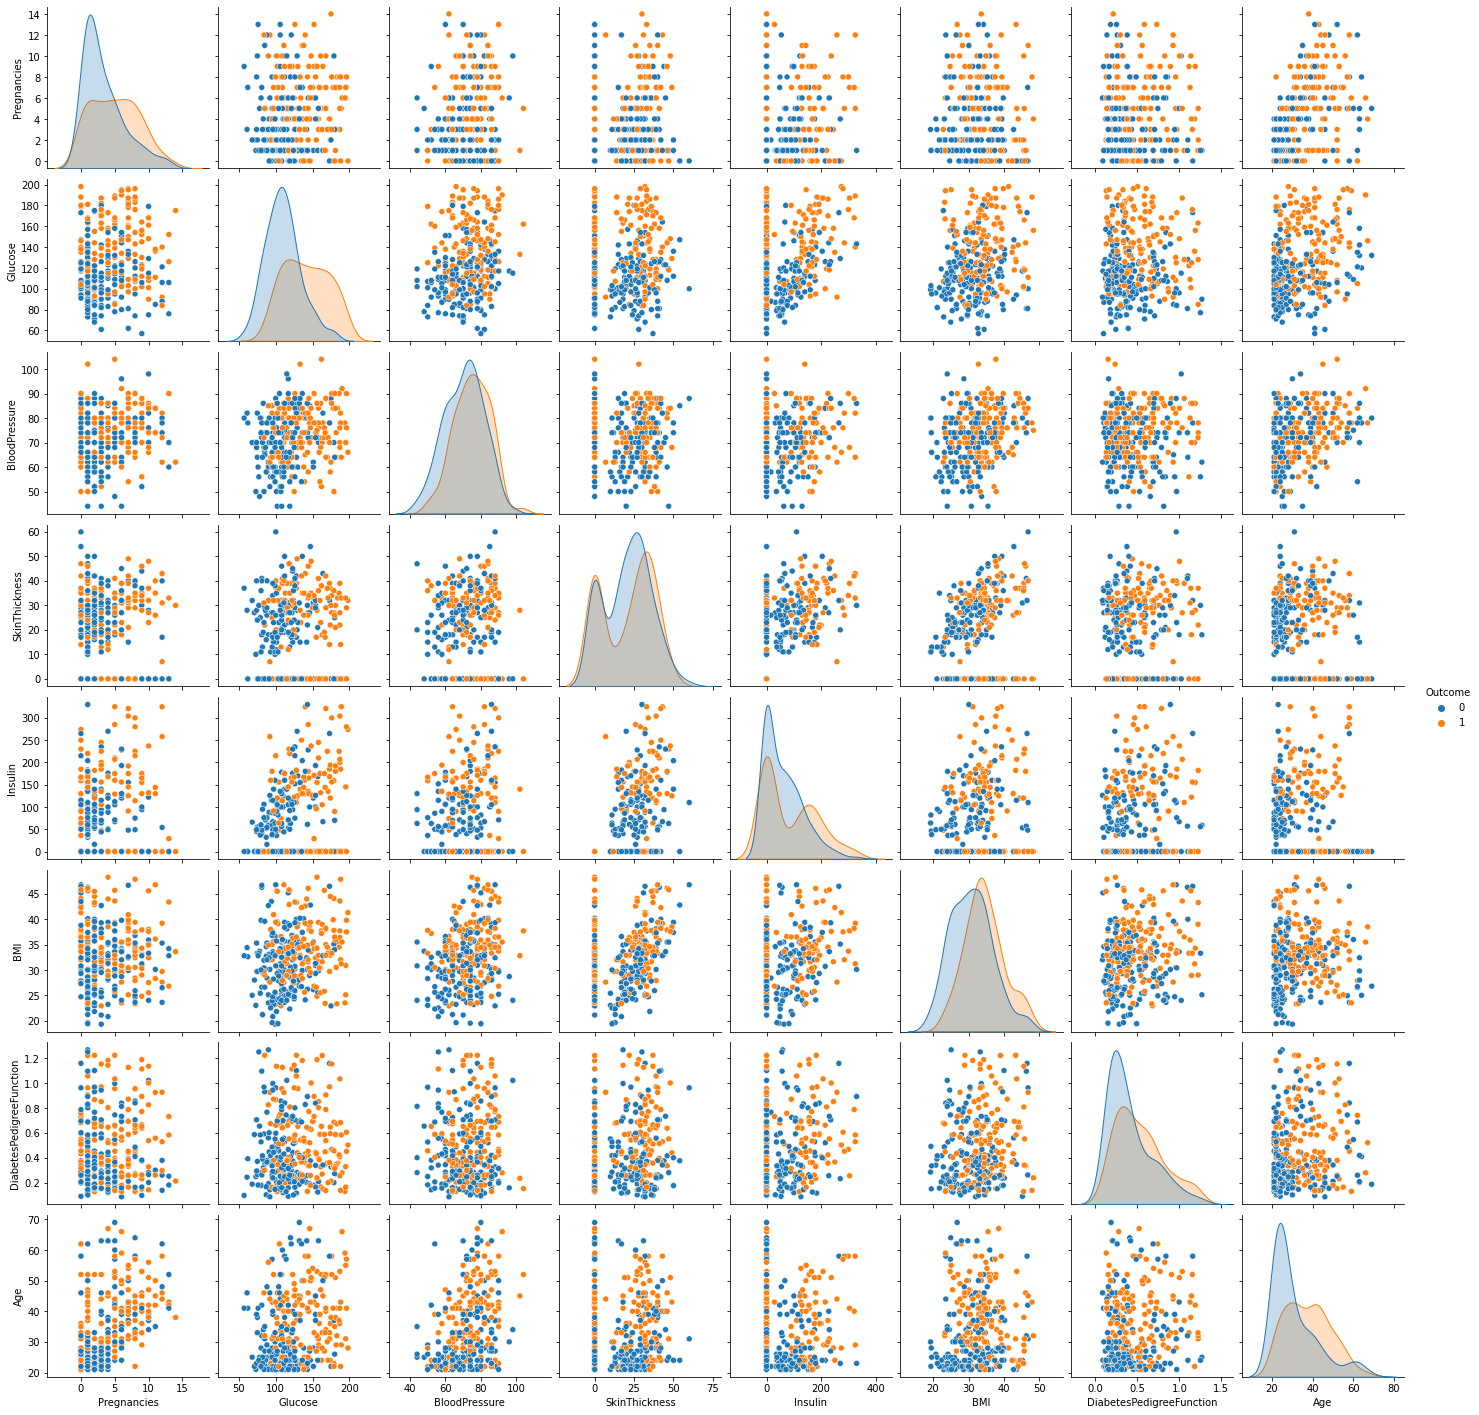

In [55]:
sns.pairplot(
    train_set_bal_cleaned[
        [
            "Pregnancies",
            "Glucose",
            "BloodPressure",
            "SkinThickness",
            "Insulin",
            "BMI",
            "DiabetesPedigreeFunction",
            "Age",
            "Outcome"
        ]
    ],
    hue="Outcome"
)

<Axes: >

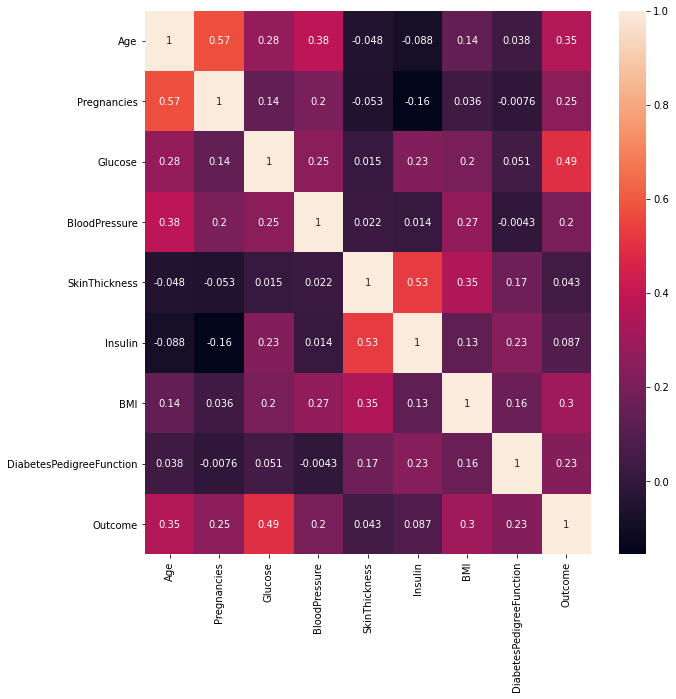

In [56]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal_cleaned.corr(method = "spearman"), annot = True, ax = ax)